## Проект "Прогнозирование поведения клиентов фитнес-центра"

Данный проект выполнен на основе данных из анкет посетителей фитнес-центра "Культурист-датасаентист" с целью оценки вероятности оттока посетителей и определения мер по улучшению коммуникации с посетителями.
В исходном датафрейме содержится следующая информация:
##### Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
##### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

### Загрузка данных

In [9]:
#импортируем необходимые библиотеки
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

import itertools

In [10]:
#загрузим данные
data = pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Исследовательский анализ данных

In [11]:
#изучим структуру данных
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [12]:
#изучим отсутствующие значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Пропусков в данных нет. Большая часть признаков разделена согласно бинарной классификации.

In [13]:
data['Churn'].unique()

array([0, 1])

In [14]:
#сгруппируем клиентов по признаку оттока и оценим средние значения признаков
data_churn = data.groupby(['Churn']).mean()
data_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


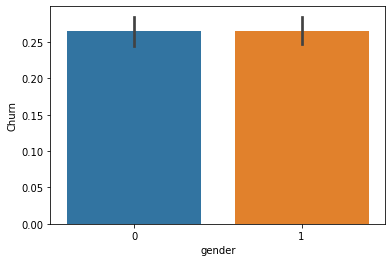

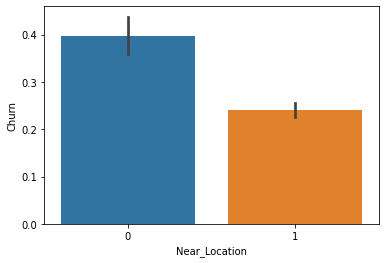

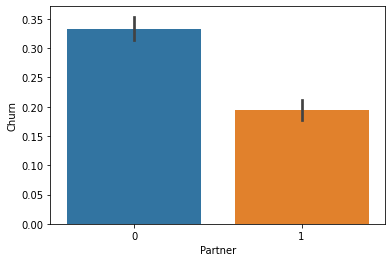

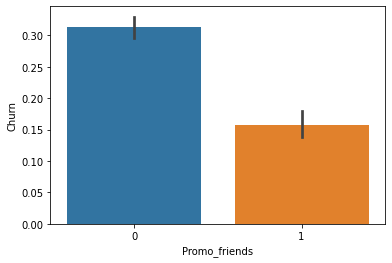

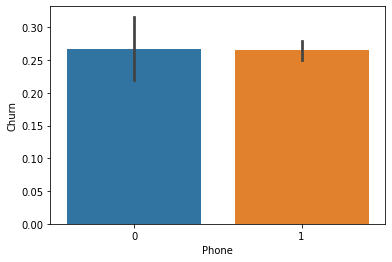

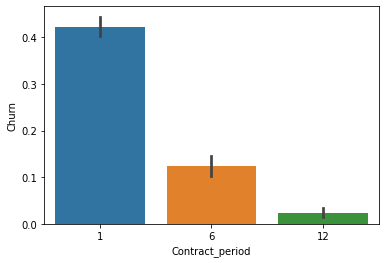

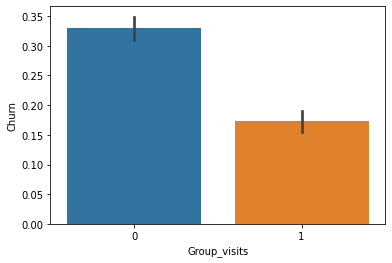

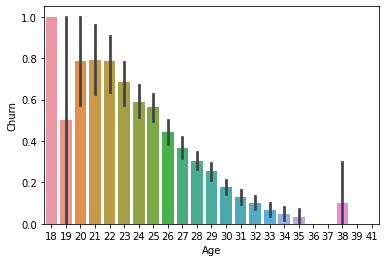

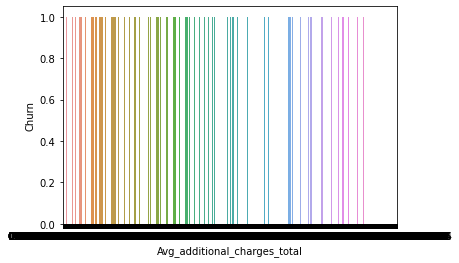

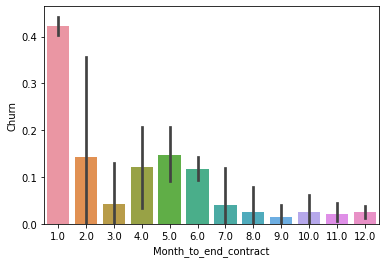

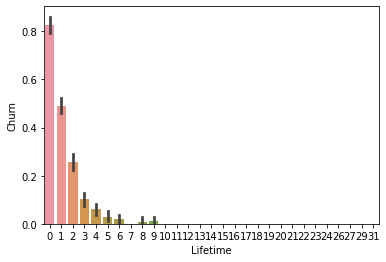

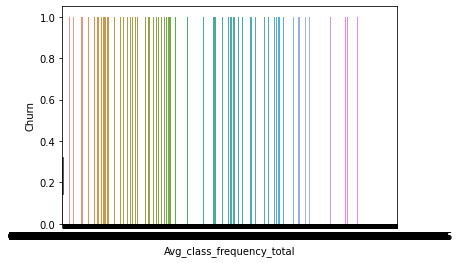

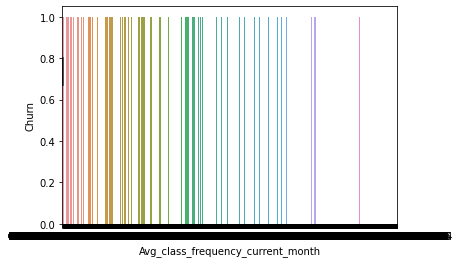

In [15]:
#построим столбчатые диаграммы для всех признаков
for col in data.drop('Churn', axis = 1).columns:
    sns.barplot(x=data[col], y=data['Churn'])
    plt.show()

По диаграммам можно предварительно определить признаки, которые дают положительную динамику посещаемости: 
- близость посещаемого фитнес-центра от места проживания, 
- посещение клуба в рамках партнерской программы (со скидкой), 
- первое посещение в рамках акции "приведи друга" (со скидкой), 
- долгая продолжительность посещения (при посещении около года значение оттока близко  к нулю),
- чем старше возраст клиента, тем меньше вероятность его "оттока",
- посещение групповых занятий.

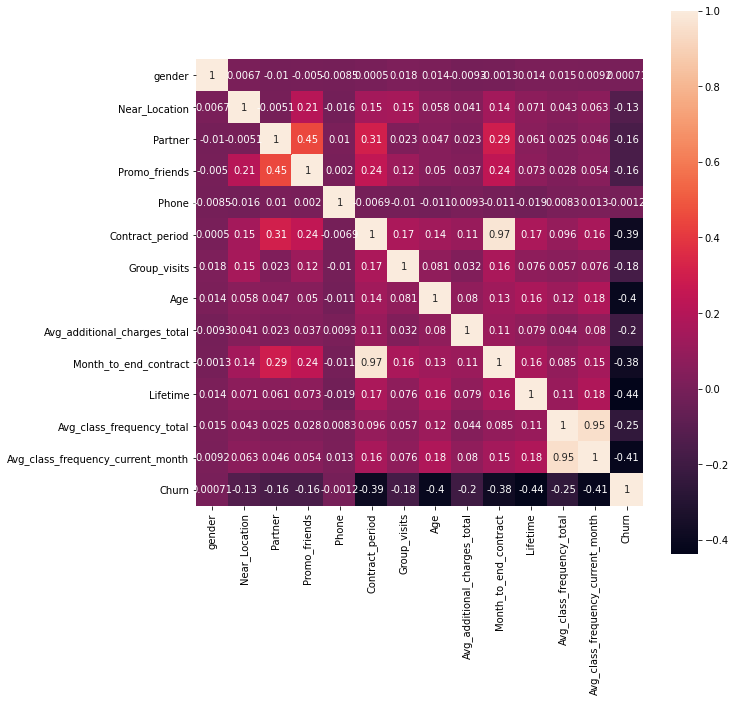

In [19]:
#построим матрицу корреляций признаков и визуализируем её:
cm = data.corr() #вычисляем матрицу корреляций
plt.figure(figsize=(10, 10)) 

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square = True)#ваш код здесь
ax.set_ylim(
    7, 0
)  # корректировка "рваных" полей heatmap в последней версии библиотеки

plt.show()

У целевой переменной "Churn" слабая корреляция с остальными признаками.

### Модель прогнозирования оттока клиентов

In [ ]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [ ]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#создадим функцию для расчета метрик
def metrics(m, y_true, predictions):
    model = m
    model.fit(X_train, y_train)
    probabilities = model.predict_proba(X_test)[:,1]
    predictions = model.predict(X_test)
    print ('Accuracy : {:.2f}'.format(accuracy_score(y_true, predictions)),
           'Precision: {:.2f}'.format(precision_score(y_true, predictions)),
           'Recall: {:.2f}'.format(recall_score(y_true, predictions)),
           'F1: {:.2f}.' .format(f1_score(y_true, predictions))
          )

In [ ]:
#рассчитаем метрики для алгоритма "логистическая регрессия"
metrics((LogisticRegression(solver = 'liblinear',random_state = 0)), y_test, predictions)

In [ ]:
#рассчитаем метрики для адгоритма "случайный лес"
metrics((RandomForestClassifier(n_estimators = 100, random_state = 0)), y_test, predictions)

Модель, обученная с помощью логистической регрессии, показала себя лучше.

### Кластеризация клиентов

In [ ]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(data)

linked = linkage(X_sc, method = 'ward')

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show() 

На основании дендрограммы можно выделить 5 кластеров -  по количеству цветов.

In [ ]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = data.groupby(['cluster_km']).mean()
clusters

Добавление кластеров подтверждает выводы, сделанные по диаграммам: редко уходят те, кто давно посещает фитнес-центр.

In [ ]:
#зададим функцию для отрисовки зависимостей между признаками
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
    
 #построим распределение признаков по кластерам
col_pairs = list(itertools.combinations(data.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], pair[1], 'cluster_km')

Определенных зависимостей между признаками по графикам не замечено.

### Выводы
Исходя из проделанного анализа, можно дать следующие рекомендации отделу маркетинга:
- Давать рекламу в местах, расположенных близко к фитнес-центра, в том числе - в жилых кварталах,
- Выделять больше средств для софинансирования партнерских программ,
- Проводить акции по привлечению знакомых.